## Fashion MNIST

In [11]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras

Load the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [3]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
class_names = np.array([
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
])

print(y_train[3], class_names[y_train[3]])

3 Dress


### Normalizing data

In [5]:
X_train, X_test = X_train/255, X_test/255

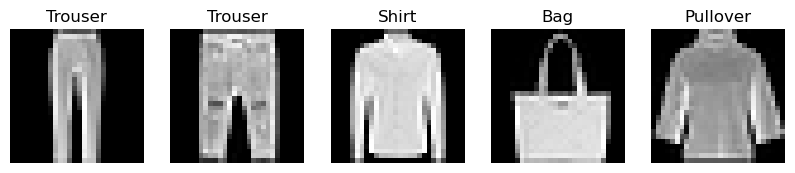

In [6]:
# Display 5 images with their class names
def display_sample(X, y, sample_size=5):
    random_indices = np.random.randint(0, len(y), sample_size)
    images, labels = X[random_indices], class_names[y[random_indices]]
    
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i], cmap="gray")
        plt.title(labels[i])
        plt.axis("off")

    plt.show()
    
display_sample(X_train, y_train)

### CNN model

In [12]:
# Define the CNN model
cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

In [15]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [13]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4615 - accuracy: 0.8347
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3106 - accuracy: 0.8879
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2663 - accuracy: 0.9025
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2357 - accuracy: 0.9133
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2127 - accuracy: 0.9230


In [16]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.2555 - accuracy: 0.9074


[0.255514532327652, 0.9074000120162964]

In [36]:
y_predicted = cnn.predict(X_test)
y_pred = np.argmax(y_predicted, axis=1)

313/313 [==============================] - 2s 7ms/step


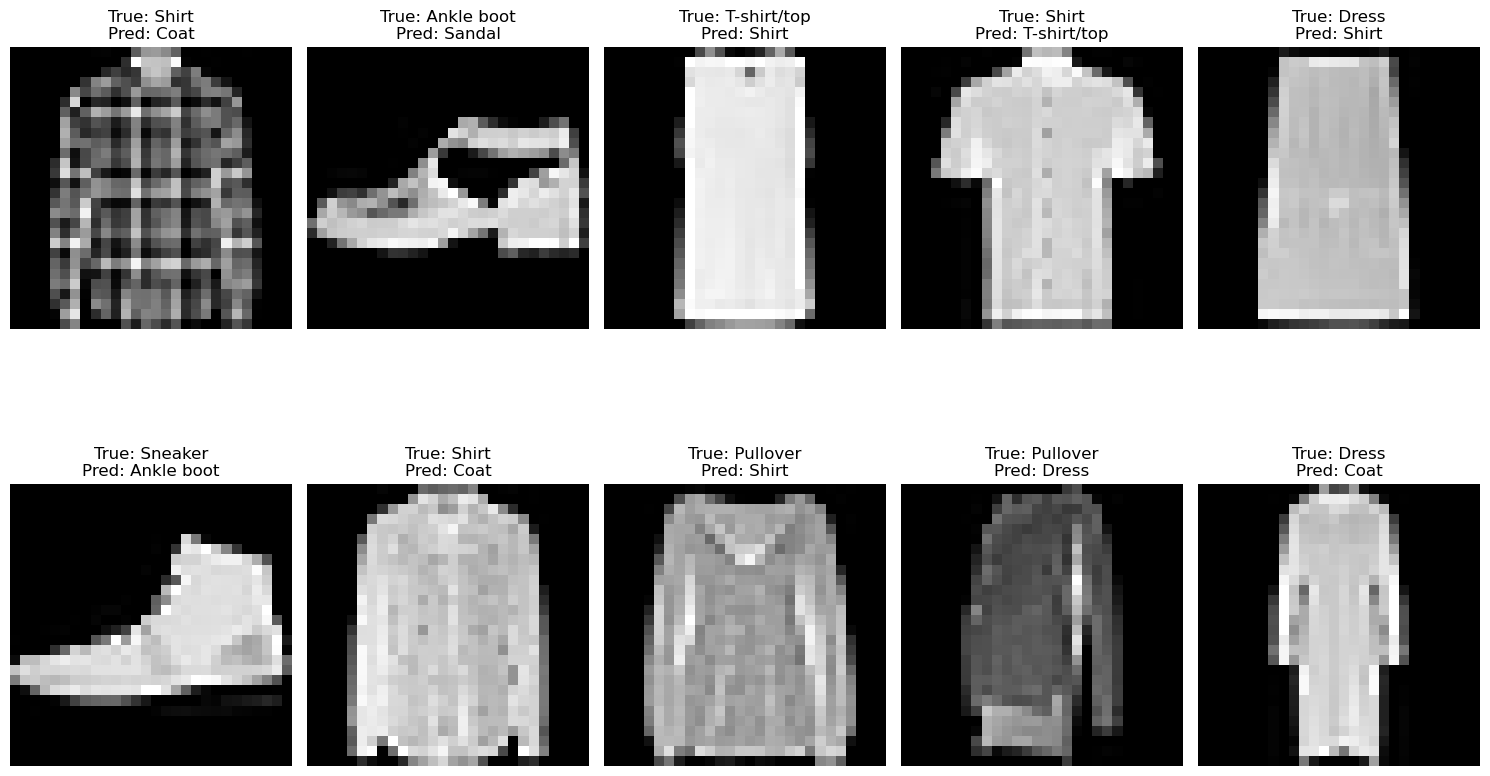

In [38]:
# Find the indices where predictions do not match the actual labels
mismatch_indices = np.where(y_test != y_pred)[0]

# Display the first 10 mismatched images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(mismatch_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap="gray")
    plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()